# Final Project 2 - GUVI Hospital Readmission prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('hospital_readmissions.csv')
df.head(10)

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes
5,6,20,Male,Elective,Injury,11,20,3,4,1,3,NaN,No
6,7,39,Female,Elective,Heart Disease,95,16,2,4,3,7,NaN,Yes
7,8,70,Female,Elective,Heart Disease,28,19,4,0,3,7,Normal,Yes
8,9,19,Male,Urgent,Infection,70,23,1,2,4,6,Normal,No
9,10,47,Male,Emergency,Injury,41,24,4,0,0,3,Abnormal,No


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


<Axes: xlabel='Gender'>

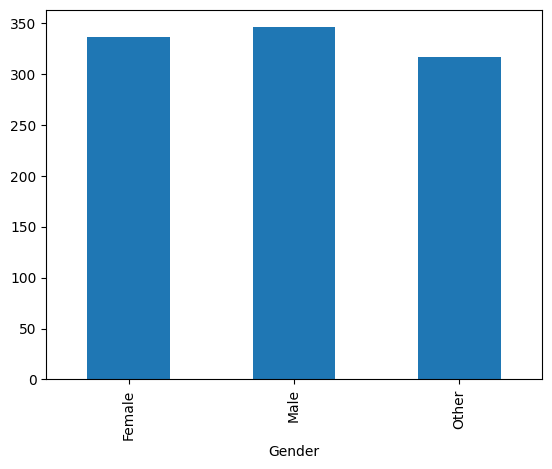

In [58]:
df.groupby(['Gender']).size().plot(kind='bar')

In [59]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['Gender'])
df['En_Gender'] = encoded
encoded = encoder.fit_transform(df['Diagnosis'])
df['En_Diagnosis'] = encoded
encoded = encoder.fit_transform(df['Admission_Type'])
df['EAdmission_Type'] = encoded
encoded = encoder.fit_transform(df['Readmitted'])
df['EReadmit'] = encoded

In [60]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,En_Gender,En_Diagnosis,EAdmission_Type,EReadmit
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes,2,1,1,1
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No,0,0,2,0
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No,0,1,2,0
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes,1,0,0,1
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes,0,0,2,1


In [61]:
df=df.drop(['A1C_Result','Gender','Admission_Type','Diagnosis','Readmitted'], axis=1)

In [62]:
df=df.drop(['Patient_ID'],axis=1)

In [63]:
df.head()

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,En_Gender,En_Diagnosis,EAdmission_Type,EReadmit
0,69,33,2,4,1,1,5,2,1,1,1
1,32,81,10,4,4,1,6,0,0,2,0
2,78,75,29,4,0,3,5,0,1,2,0
3,38,77,11,2,3,4,9,1,0,0,1
4,41,50,25,3,4,1,3,0,0,2,1


In [64]:
df.shape

(1000, 11)

In [65]:
corr = df.select_dtypes('number').corr()

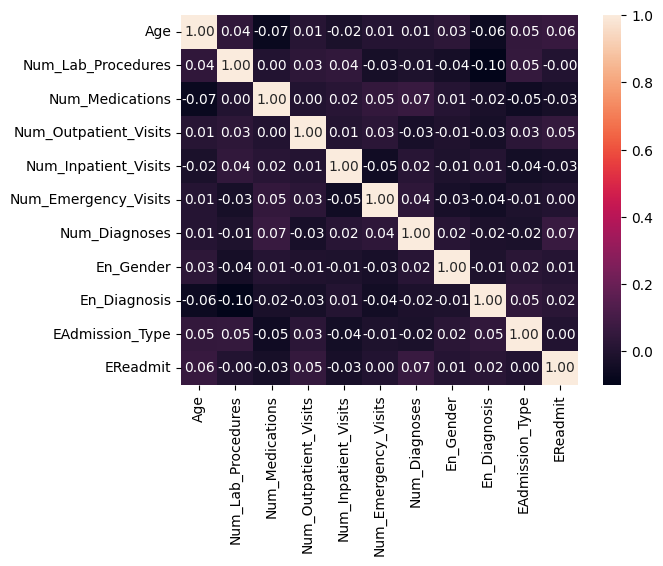

In [66]:
figure,ax = plt.subplots()
sns.heatmap(corr,annot=True,fmt=".2f",ax=ax)
plt.show()

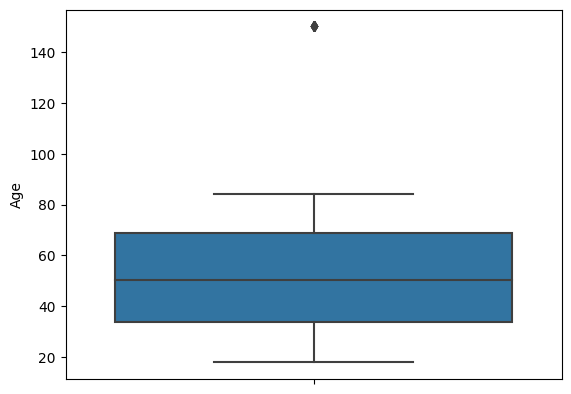

In [67]:
fig,ax = plt.subplots()
sns.boxplot(data=df,y=df['Age'],ax=ax)
plt.show()

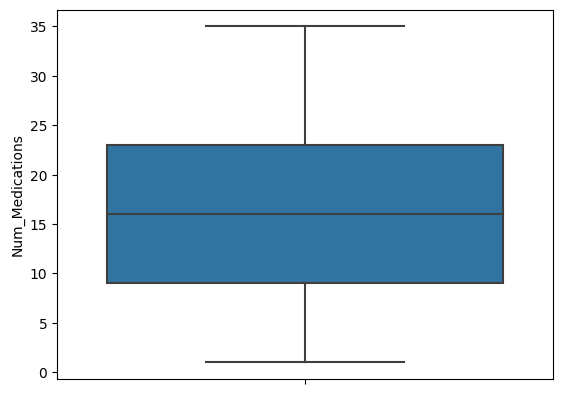

In [103]:
fig,ax = plt.subplots()
sns.boxplot(data=df,y=df['Num_Medications'],ax=ax)
plt.show()

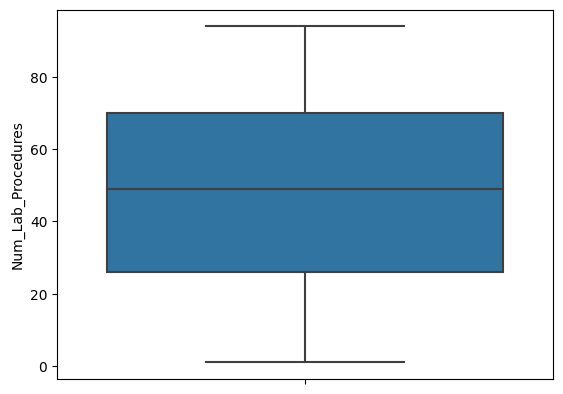

In [104]:
fig,ax = plt.subplots()
sns.boxplot(data=df,y=df['Num_Lab_Procedures'],ax=ax)
plt.show()

<Axes: xlabel='En_Gender'>

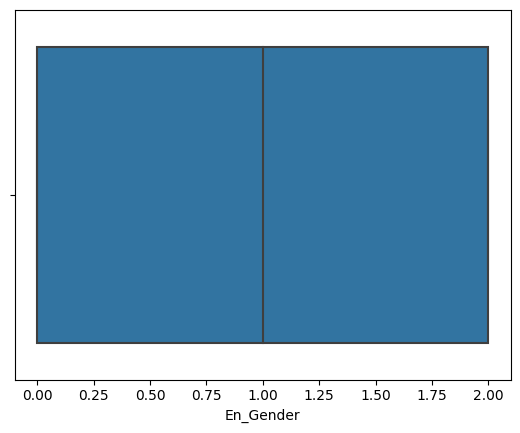

In [69]:
df = df[df['Age']<100]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    990 non-null    int64
 1   Num_Lab_Procedures     990 non-null    int64
 2   Num_Medications        990 non-null    int64
 3   Num_Outpatient_Visits  990 non-null    int64
 4   Num_Inpatient_Visits   990 non-null    int64
 5   Num_Emergency_Visits   990 non-null    int64
 6   Num_Diagnoses          990 non-null    int64
 7   En_Gender              990 non-null    int32
 8   En_Diagnosis           990 non-null    int32
 9   EAdmission_Type        990 non-null    int32
 10  EReadmit               990 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 77.3 KB


In [71]:
df['En_Diagnosis'].unique()

array([1, 0, 3, 2])

In [72]:
df = df[df['Num_Lab_Procedures']<95]

In [73]:
df.shape
#df=df.drop(['Num_Inpatient_Visits','EAdmission_Type','Num_Inpatient_Visits','Num_Lab_Procedures'],axis=1)

(943, 11)

In [74]:
df=df.drop(['Num_Diagnoses'],axis=1)

In [75]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]
X

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,En_Gender,En_Diagnosis,EAdmission_Type
0,69,33,2,4,1,1,2,1,1
1,32,81,10,4,4,1,0,0,2
2,78,75,29,4,0,3,0,1,2
3,38,77,11,2,3,4,1,0,0
4,41,50,25,3,4,1,0,0,2
...,...,...,...,...,...,...,...,...,...
995,21,68,10,2,3,2,0,1,1
996,43,61,7,0,4,0,0,1,1
997,75,29,13,3,1,4,1,0,2
998,46,19,20,1,4,4,2,3,0


In [76]:
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/4, random_state = 52)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
clf=model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#clf.score(X,Y)*100
accuracy_score(y_test,y_pred)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5084745762711864

In [79]:
grid = {'penalty':['l2'],}
grid_rf = GridSearchCV(estimator=clf,param_grid=grid,scoring='accuracy',return_train_score=True)
grid_rf.fit(X_train,y_train)
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.46682649086005396
{'penalty': 'l2'}


C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [80]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [81]:
xb = GradientBoostingClassifier(n_estimators = 10, random_state=6)
xb.fit(X_train, y_train)
xbpred = xb.predict(X_test)
accuracy = accuracy_score(y_test,xbpred)
print("GBoost Accuracy:", accuracy)

GBoost Accuracy: 0.5338983050847458


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
xbpred = rf.predict(X_test)
accuracy_score(y_test,xbpred)

0.5508474576271186

In [85]:
df.groupby(['EReadmit']).size()

EReadmit
0    474
1    469
dtype: int64

In [86]:
cls = SVC(random_state = 42)
cls.fit(X_train,y_train)

SVC(random_state=42)

In [87]:
ypred = cls.predict(X_test)
accuracy_score(y_test,ypred)


0.4830508474576271

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
kpred = knn.predict(X_test)
accuracy = accuracy_score(y_test,kpred)
accuracy

0.5254237288135594

In [89]:
from sklearn.linear_model import Lasso, Ridge
#import r2_score
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train, y_train)
x_pred_lasso_test = lasso.predict(X_test)
r2_score(y_test, x_pred_lasso_test)

rid = Ridge()
rid.fit(X_train, y_train)
x_pred_lasso_test = rid.predict(X_test)
r2_score(y_test, x_pred_lasso_test)

-0.011397587835632939

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train) 
# Predict the classes of the testing data 
y_pred = clf.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred) 
print("DTC Accuracy:", accuracy)

DTC Accuracy: 0.4703389830508475


In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
from collections import Counter

In [94]:
print(Counter(y_train))

Counter({0: 365, 1: 342})


In [95]:
smt = SMOTE(k_neighbors=5,random_state=42)

In [96]:
X_train_sm, Y_train_sm = smt.fit_resample(X_train,y_train)

In [97]:
print(Counter(Y_train_sm))

Counter({1: 365, 0: 365})


In [98]:
clf.fit(X_train_sm, Y_train_sm) 

DecisionTreeClassifier()

In [99]:
accuracy = accuracy_score(y_test, y_pred) 

In [100]:
accuracy

0.4703389830508475

In [101]:
lasso.fit(X_train_sm, Y_train_sm)
x_pred_lasso_test = lasso.predict(X_test)
r2_score(y_test, x_pred_lasso_test)

-0.005851332803583187

In [102]:
xb.fit(X_train_sm, Y_train_sm)
xbpred = xb.predict(X_test)
accuracy = accuracy_score(y_test,xbpred)
print("GBoost Accuracy:", accuracy)


GBoost Accuracy: 0.5423728813559322
